In [1]:
%load_ext autoreload
%autoreload 2

import os
from jax import config
config.update("jax_enable_x64", True)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '1'
from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

import tensorflow_datasets as tfds  # TFDS for MNIST
import tensorflow as tf             # TensorFlow operations

# from image_distribution_models import PixelCNN

from cleanplots import *
import jax.numpy as np
from jax.scipy.special import logsumexp

from encoding_information.models.pixel_cnn import PixelCNN
from encoding_information.models.gaussian_process import FullGaussianProcess
import tensorflow as tf



/home/hpinkard_waller/mambaforge/envs/encoding_info/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-12 09:08:44.841212: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

seed = 0

eigenvalue_floor = 1e-3


gp = FullGaussianProcess(train_images.reshape(train_images.shape[0], -1), eigenvalue_floor=eigenvalue_floor)


trying eigenvalue floor of 0.01


/home/hpinkard_waller/GitRepos/EncodingInformation/encoding_information/models/gaussian_process.py:669: UserWarning: Covariance matrix is not positive definite even after applying eigenvalue floor. This indicates numerical error.Try raising the eigenvalue floor than the current value of 0.001
  warnings.warn('Covariance matrix is not positive definite even after applying eigenvalue floor. This indicates numerical error.' +


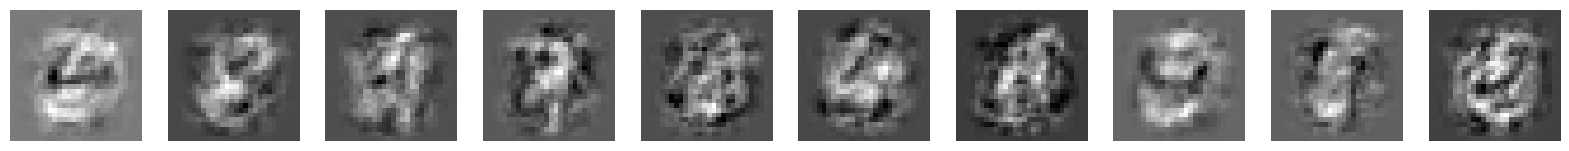

In [7]:
images = gp.generate_samples(10)
images = images.reshape(-1, 28, 28)

fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].axis('off')